# Buzz Distribution Analysis

This notebook analyzes the distribution of interest and divisiveness scores from different LLM providers (OpenAI vs Claude) at different temperature settings.

We'll explore:
1. How temperature affects the variability of interest and divisiveness scores
2. Differences between OpenAI and Claude's assessments
3. Visual comparison of score distributions

In [3]:
import sys
sys.path.append('..')
import os
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from buzz import query_interest_openrouter, query_divisiveness_openrouter

# Ensure OpenRouter API key is set
assert os.environ.get('OPENROUTER_API_KEY'), "OPENROUTER_API_KEY not set"

## Configuration

In [4]:
# Topic to analyze
TOPIC = "Should Donald Trump win the nobel peace price?"

# Number of samples to collect for each configuration
N_SAMPLES = 20

# Temperature settings to compare
LOW_TEMP = 0.3
HIGH_TEMP = 0.9

# API key from environment
OPENROUTER_KEY = os.environ.get('OPENROUTER_API_KEY')

## Data Collection Functions

In [5]:
def collect_interest_samples(topic, model, api_key, temperature, n_samples):
    """Collect interest score samples from OpenRouter."""
    scores = []
    
    for i in range(n_samples):
        try:
            score = query_interest_openrouter(topic, model, api_key, temperature=temperature)
            scores.append(score)
            print(f"  Sample {i+1}/{n_samples}: {score:.3f}")
        except Exception as e:
            print(f"  Error on sample {i+1}: {str(e)}")
    
    return scores

def collect_divisiveness_samples(topic, model, api_key, temperature, n_samples):
    """Collect divisiveness score samples from OpenRouter."""
    scores = []
    
    for i in range(n_samples):
        try:
            score = query_divisiveness_openrouter(topic, model, api_key, temperature=temperature)
            scores.append(score)
            print(f"  Sample {i+1}/{n_samples}: {score:.3f}")
        except Exception as e:
            print(f"  Error on sample {i+1}: {str(e)}")
    
    return scores

## Collect Interest Scores

We'll collect interest scores from both providers at low and high temperatures.

In [6]:
print(f"Collecting INTEREST scores for topic: {TOPIC}\n")

print("OpenAI - Low Temperature (0.3):")
interest_openai_low = collect_interest_samples(TOPIC, "openai/gpt-4o-mini", OPENROUTER_KEY, LOW_TEMP, N_SAMPLES)

print("\nOpenAI - High Temperature (0.9):")
interest_openai_high = collect_interest_samples(TOPIC, "openai/gpt-4o-mini", OPENROUTER_KEY, HIGH_TEMP, N_SAMPLES)

print("\nClaude - Low Temperature (0.3):")
interest_claude_low = collect_interest_samples(TOPIC, "anthropic/claude-sonnet-4", OPENROUTER_KEY, LOW_TEMP, N_SAMPLES)

print("\nClaude - High Temperature (0.9):")
interest_claude_high = collect_interest_samples(TOPIC, "anthropic/claude-sonnet-4", OPENROUTER_KEY, HIGH_TEMP, N_SAMPLES)


OpenAI - Low Temperature (0.3):
  Sample 1/20: 0.450
  Sample 2/20: 0.450
  Sample 3/20: 0.450
  Sample 4/20: 0.550
  Sample 5/20: 0.450
  Sample 6/20: 0.550
  Sample 7/20: 0.550
  Sample 8/20: 0.450
  Sample 9/20: 0.450
  Sample 10/20: 0.550
  Sample 11/20: 0.450
  Sample 12/20: 0.550
  Sample 13/20: 0.450
  Sample 14/20: 0.450
  Sample 15/20: 0.450
  Sample 16/20: 0.450
  Sample 17/20: 0.450
  Sample 18/20: 0.450
  Sample 19/20: 0.550
  Sample 20/20: 0.450

OpenAI - High Temperature (0.9):
  Sample 1/20: 0.350
  Sample 2/20: 0.450
  Sample 3/20: 0.550
  Sample 4/20: 0.450
  Sample 5/20: 0.350
  Sample 6/20: 0.450
  Sample 7/20: 0.550
  Sample 8/20: 0.450
  Sample 9/20: 0.550
  Sample 10/20: 0.450
  Sample 11/20: 0.350
  Sample 12/20: 0.350
  Sample 13/20: 0.550
  Sample 14/20: 0.550
  Sample 15/20: 0.450
  Sample 16/20: 0.550
  Sample 17/20: 0.540
  Sample 18/20: 0.550
  Sample 19/20: 0.350
  Sample 20/20: 0.550

Claude - Low Temperature (0.3):
  Sample 1/20: 0.150
  Sample 2/20: 0.

## Collect Divisiveness Scores

Now we'll collect divisiveness scores from both providers at low and high temperatures.

In [7]:
print(f"\n\nCollecting DIVISIVENESS scores for topic: {TOPIC}\n")

print("OpenAI - Low Temperature (0.3):")
div_openai_low = collect_divisiveness_samples(TOPIC, "openai/gpt-4o-mini", OPENROUTER_KEY, LOW_TEMP, N_SAMPLES)

print("\nOpenAI - High Temperature (0.9):")
div_openai_high = collect_divisiveness_samples(TOPIC, "openai/gpt-4o-mini", OPENROUTER_KEY, HIGH_TEMP, N_SAMPLES)

print("\nClaude - Low Temperature (0.3):")
div_claude_low = collect_divisiveness_samples(TOPIC, "anthropic/claude-sonnet-4", OPENROUTER_KEY, LOW_TEMP, N_SAMPLES)

print("\nClaude - High Temperature (0.9):")
div_claude_high = collect_divisiveness_samples(TOPIC, "anthropic/claude-sonnet-4", OPENROUTER_KEY, HIGH_TEMP, N_SAMPLES)




OpenAI - Low Temperature (0.3):
  Sample 1/20: 0.820
  Sample 2/20: 0.850
  Sample 3/20: 0.820
  Sample 4/20: 0.850
  Sample 5/20: 0.780
  Sample 6/20: 0.780
  Sample 7/20: 0.850
  Sample 8/20: 0.820
  Sample 9/20: 0.850
  Sample 10/20: 0.820
  Sample 11/20: 0.780
  Sample 12/20: 0.820
  Sample 13/20: 0.820
  Sample 14/20: 0.850
  Sample 15/20: 0.850
  Sample 16/20: 0.850
  Sample 17/20: 0.780
  Sample 18/20: 0.780
  Sample 19/20: 0.820
  Sample 20/20: 0.780

OpenAI - High Temperature (0.9):
  Sample 1/20: 0.780
  Sample 2/20: 0.820
  Sample 3/20: 0.780
  Sample 4/20: 0.780
  Sample 5/20: 0.760
  Sample 6/20: 0.850
  Sample 7/20: 0.750
  Sample 8/20: 0.850
  Sample 9/20: 0.850
  Sample 10/20: 0.780
  Sample 11/20: 0.850
  Sample 12/20: 0.850
  Sample 13/20: 0.820
  Sample 14/20: 0.750
  Sample 15/20: 0.820
  Sample 16/20: 0.780
  Sample 17/20: 0.820
  Sample 18/20: 0.850
  Sample 19/20: 0.830
  Sample 20/20: 0.850

Claude - Low Temperature (0.3):
  Sample 1/20: 0.850
  Sample 2/20: 

## Summary Statistics

In [8]:
# Create DataFrame for interest scores
interest_data = {
    'OpenAI Low Temp': interest_openai_low,
    'OpenAI High Temp': interest_openai_high,
    'Claude Low Temp': interest_claude_low,
    'Claude High Temp': interest_claude_high
}

interest_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in interest_data.items()]))

print("\n=== INTEREST SCORE STATISTICS ===")
print(interest_df.describe())

# Create DataFrame for divisiveness scores
div_data = {
    'OpenAI Low Temp': div_openai_low,
    'OpenAI High Temp': div_openai_high,
    'Claude Low Temp': div_claude_low,
    'Claude High Temp': div_claude_high
}

div_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in div_data.items()]))

print("\n=== DIVISIVENESS SCORE STATISTICS ===")
print(div_df.describe())


=== INTEREST SCORE STATISTICS ===
       OpenAI Low Temp  OpenAI High Temp  Claude Low Temp  Claude High Temp
count        20.000000         20.000000     2.000000e+01      2.000000e+01
mean          0.480000          0.469500     1.500000e-01      1.500000e-01
std           0.047016          0.082874     2.847662e-17      2.847662e-17
min           0.450000          0.350000     1.500000e-01      1.500000e-01
25%           0.450000          0.425000     1.500000e-01      1.500000e-01
50%           0.450000          0.450000     1.500000e-01      1.500000e-01
75%           0.550000          0.550000     1.500000e-01      1.500000e-01
max           0.550000          0.550000     1.500000e-01      1.500000e-01

=== DIVISIVENESS SCORE STATISTICS ===
       OpenAI Low Temp  OpenAI High Temp  Claude Low Temp  Claude High Temp
count        20.000000          20.00000     2.000000e+01      2.000000e+01
mean          0.818500           0.81100     8.500000e-01      8.500000e-01
std           

## Visualization: Interest Score Distributions

In [9]:
# Create histograms for interest scores with larger size and better fonts
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        'OpenAI - Low Temp (0.3)',
        'OpenAI - High Temp (0.9)',
        'Claude - Low Temp (0.3)',
        'Claude - High Temp (0.9)'
    ),
    vertical_spacing=0.15,
    horizontal_spacing=0.12
)

# Add histograms
fig.add_trace(
    go.Histogram(x=interest_openai_low, name='OpenAI Low', marker_color='lightblue', nbinsx=15),
    row=1, col=1
)
fig.add_trace(
    go.Histogram(x=interest_openai_high, name='OpenAI High', marker_color='darkblue', nbinsx=15),
    row=1, col=2
)
fig.add_trace(
    go.Histogram(x=interest_claude_low, name='Claude Low', marker_color='lightgreen', nbinsx=15),
    row=2, col=1
)
fig.add_trace(
    go.Histogram(x=interest_claude_high, name='Claude High', marker_color='darkgreen', nbinsx=15),
    row=2, col=2
)

# Update layout with larger size and fonts
fig.update_xaxes(title_text="Interest Score", range=[0, 1], title_font_size=16, tickfont_size=14)
fig.update_yaxes(title_text="Frequency", title_font_size=16, tickfont_size=14)
fig.update_layout(
    height=1000,  # Increased from 700
    width=1400,   # Added width
    title_text=f"Interest Score Distributions: {TOPIC}",
    title_font_size=20,
    showlegend=False,
    font=dict(size=14)
)

# Update subplot titles font size
for annotation in fig['layout']['annotations']:
    annotation['font'] = dict(size=16)

fig.show()

## Visualization: Divisiveness Score Distributions

In [10]:
# Create histograms for divisiveness scores with larger size and better fonts
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        'OpenAI - Low Temp (0.3)',
        'OpenAI - High Temp (0.9)',
        'Claude - Low Temp (0.3)',
        'Claude - High Temp (0.9)'
    ),
    vertical_spacing=0.15,
    horizontal_spacing=0.12
)

# Add histograms
fig.add_trace(
    go.Histogram(x=div_openai_low, name='OpenAI Low', marker_color='lightcoral', nbinsx=15),
    row=1, col=1
)
fig.add_trace(
    go.Histogram(x=div_openai_high, name='OpenAI High', marker_color='darkred', nbinsx=15),
    row=1, col=2
)
fig.add_trace(
    go.Histogram(x=div_claude_low, name='Claude Low', marker_color='lightyellow', nbinsx=15),
    row=2, col=1
)
fig.add_trace(
    go.Histogram(x=div_claude_high, name='Claude High', marker_color='orange', nbinsx=15),
    row=2, col=2
)

# Update layout with larger size and fonts
fig.update_xaxes(title_text="Divisiveness Score", range=[0, 1], title_font_size=16, tickfont_size=14)
fig.update_yaxes(title_text="Frequency", title_font_size=16, tickfont_size=14)
fig.update_layout(
    height=1000,  # Increased from 700
    width=1400,   # Added width
    title_text=f"Divisiveness Score Distributions: {TOPIC}",
    title_font_size=20,
    showlegend=False,
    font=dict(size=14)
)

# Update subplot titles font size
for annotation in fig['layout']['annotations']:
    annotation['font'] = dict(size=16)

fig.show()

## Box Plot Comparison: Interest Scores

In [11]:
# Prepare data for box plot
interest_plot_data = []
for config, scores in interest_data.items():
    for score in scores:
        provider = 'OpenAI' if 'OpenAI' in config else 'Claude'
        temp = 'Low (0.3)' if 'Low' in config else 'High (0.9)'
        interest_plot_data.append({
            'Score': score,
            'Provider': provider,
            'Temperature': temp,
            'Config': config
        })

interest_plot_df = pd.DataFrame(interest_plot_data)

fig = px.box(
    interest_plot_df,
    x='Temperature',
    y='Score',
    color='Provider',
    title=f'Interest Score Comparison: {TOPIC}',
    labels={'Score': 'Interest Score (0-1)'},
    points='all'
)

# Increase size and font sizes
fig.update_layout(
    height=700,  # Increased from 500
    width=1200,  # Added width
    yaxis_range=[0, 1],
    title_font_size=20,
    font=dict(size=14),
    xaxis=dict(title_font_size=16, tickfont_size=14),
    yaxis=dict(title_font_size=16, tickfont_size=14),
    legend=dict(font=dict(size=14))
)

fig.show()

## Box Plot Comparison: Divisiveness Scores

In [12]:
# Prepare data for box plot
div_plot_data = []
for config, scores in div_data.items():
    for score in scores:
        provider = 'OpenAI' if 'OpenAI' in config else 'Claude'
        temp = 'Low (0.3)' if 'Low' in config else 'High (0.9)'
        div_plot_data.append({
            'Score': score,
            'Provider': provider,
            'Temperature': temp,
            'Config': config
        })

div_plot_df = pd.DataFrame(div_plot_data)

fig = px.box(
    div_plot_df,
    x='Temperature',
    y='Score',
    color='Provider',
    title=f'Divisiveness Score Comparison: {TOPIC}',
    labels={'Score': 'Divisiveness Score (0-1)'},
    points='all'
)

# Increase size and font sizes
fig.update_layout(
    height=700,  # Increased from 500
    width=1200,  # Added width
    yaxis_range=[0, 1],
    title_font_size=20,
    font=dict(size=14),
    xaxis=dict(title_font_size=16, tickfont_size=14),
    yaxis=dict(title_font_size=16, tickfont_size=14),
    legend=dict(font=dict(size=14))
)

fig.show()

## Scatter Plot: Interest vs Divisiveness

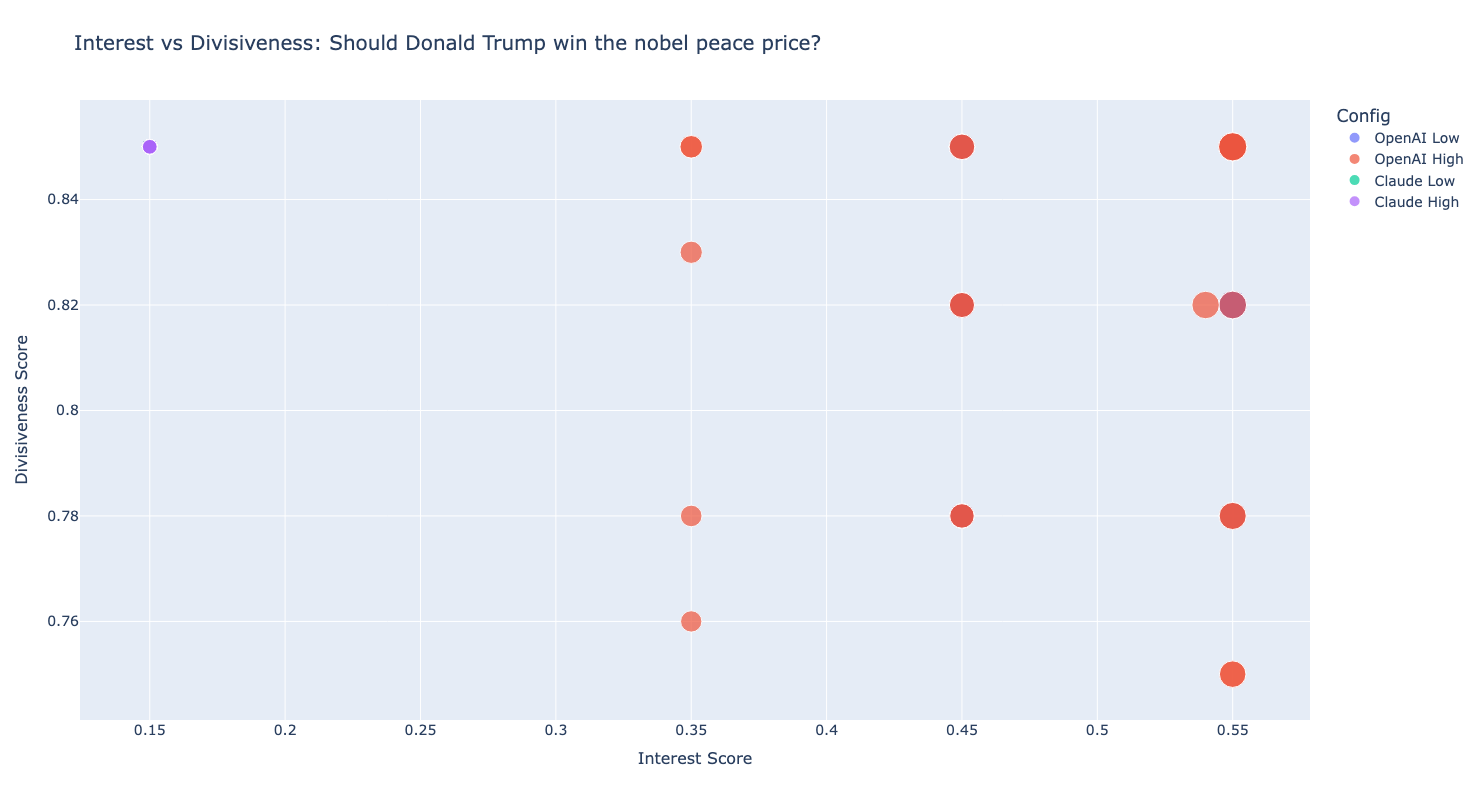

In [13]:
# Create scatter plot comparing interest and divisiveness
scatter_data = []

configs = [
    ('OpenAI Low', interest_openai_low, div_openai_low),
    ('OpenAI High', interest_openai_high, div_openai_high),
    ('Claude Low', interest_claude_low, div_claude_low),
    ('Claude High', interest_claude_high, div_claude_high)
]

for config_name, interest_scores, div_scores in configs:
    for i, d in zip(interest_scores, div_scores):
        scatter_data.append({
            'Interest': i,
            'Divisiveness': d,
            'Buzz': i * d,  # Combined buzz score
            'Config': config_name
        })

scatter_df = pd.DataFrame(scatter_data)

fig = px.scatter(
    scatter_df,
    x='Interest',
    y='Divisiveness',
    color='Config',
    size='Buzz',
    title=f'Interest vs Divisiveness: {TOPIC}',
    labels={'Interest': 'Interest Score', 'Divisiveness': 'Divisiveness Score'},
    hover_data=['Buzz']
)

# Increase size and font sizes
fig.update_layout(
    height=800,   # Increased from 600
    width=1200,   # Added width
    title_font_size=20,
    font=dict(size=14),
    xaxis=dict(title_font_size=16, tickfont_size=14),
    yaxis=dict(title_font_size=16, tickfont_size=14),
    legend=dict(font=dict(size=14))
)

fig.show()

## Variance Analysis

In [14]:
print("\n=== VARIANCE ANALYSIS ===")
print("\nInterest Scores - Standard Deviation:")
for config, scores in interest_data.items():
    print(f"  {config:25s}: {np.std(scores):.4f}")

print("\nDivisiveness Scores - Standard Deviation:")
for config, scores in div_data.items():
    print(f"  {config:25s}: {np.std(scores):.4f}")

print("\nVariance Ratio (High Temp / Low Temp):")
interest_openai_ratio = np.std(interest_openai_high) / np.std(interest_openai_low) if np.std(interest_openai_low) > 0 else float('inf')
interest_claude_ratio = np.std(interest_claude_high) / np.std(interest_claude_low) if np.std(interest_claude_low) > 0 else float('inf')
div_openai_ratio = np.std(div_openai_high) / np.std(div_openai_low) if np.std(div_openai_low) > 0 else float('inf')
div_claude_ratio = np.std(div_claude_high) / np.std(div_claude_low) if np.std(div_claude_low) > 0 else float('inf')

print(f"  OpenAI Interest:     {interest_openai_ratio:.2f}x")
print(f"  Claude Interest:     {interest_claude_ratio:.2f}x")
print(f"  OpenAI Divisiveness: {div_openai_ratio:.2f}x")
print(f"  Claude Divisiveness: {div_claude_ratio:.2f}x")


=== VARIANCE ANALYSIS ===

Interest Scores - Standard Deviation:
  OpenAI Low Temp          : 0.0458
  OpenAI High Temp         : 0.0808
  Claude Low Temp          : 0.0000
  Claude High Temp         : 0.0000

Divisiveness Scores - Standard Deviation:
  OpenAI Low Temp          : 0.0282
  OpenAI High Temp         : 0.0362
  Claude Low Temp          : 0.0000
  Claude High Temp         : 0.0000

Variance Ratio (High Temp / Low Temp):
  OpenAI Interest:     1.76x
  Claude Interest:     1.00x
  OpenAI Divisiveness: 1.28x
  Claude Divisiveness: infx


## Key Findings

**Temperature Effects:**
- Higher temperature should increase variance in scores
- Check if this holds for both interest and divisiveness

**Provider Differences:**
- Compare mean scores between OpenAI and Claude
- Check if providers have different baseline assessments
- Examine if one provider is more sensitive to temperature

**Interest vs Divisiveness:**
- Are these metrics correlated?
- Does the scatter plot show any clustering patterns?
- How does the combined buzz score (interest × divisiveness) vary?

## Try Different Topics

Modify the `TOPIC` variable in the configuration cell and re-run all cells to analyze different topics.

In [ ]:
# Suggested topics to try:
# - "Climate Change"
# - "Artificial Intelligence"
# - "Taylor Swift"
# - "The Beatles"
# - "Ukraine War"